In [20]:
import sys
import scipy.optimize, scipy.special
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as pl
from matplotlib import cm
import seaborn as sns

In [23]:
%matplotlib inline

In [14]:
# load in data 
data = np.genfromtxt("C:\\Users\\Home\\Documents\\R_code\\Coursera\\Machine Learning\\machine-learning-ex2\\ex2\\ex2data1.txt"
                    ,delimiter = ',')

m, n = np.shape( data )[0], np.shape(data)[1] - 1
X = np.c_[ np.ones((m,1)), data[:, :n]]
y = data[:, n:n+1]

In [24]:
# plot the data
def plot(data):
    pos = data[data[:,2] == 1]
    neg = data[data[:,2] == 0]
    
    pl.xlabel("Exam 1 score")
    pl.ylabel("Exam 2 score")
    pl.xlim([25,115])
    pl.ylim([25,115])
    
    pl.scatter(neg[:,0], neg[:,1], c ='y', marker='o', s=40, linewidths=1, label = "Not admitted")
    pl.scatter(pos[:,0], pos[:,1], c ='b', marker='+', s=40, linewidths=2, label = "Admitted")
    pl.legend()

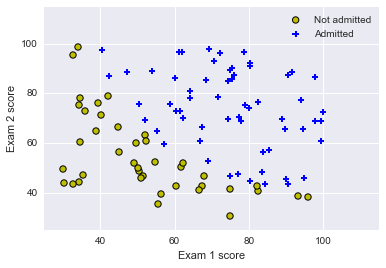

In [25]:
plot(data)

# Part 1 of Assignment

In [31]:
# create the sigmoid function
def sigmoid(z) :
    return 1.0 / (1.0 + np.exp(-z))
    #return scipy.special.expit(z)

In [40]:
# define the cost computation
def computeCost(theta, X, y):
    m = np.shape( X )[0]
    hypo = sigmoid(X.dot(theta))
    term1 = np.log( hypo  ).T.dot( - y)
    term2 = np.log(1.0 - hypo).T.dot(1 - y)
    return ((term1 - term2) / m ).flatten()

In [34]:
# define the gradient cost function
def gradientCost(theta, X, y):
    m = np.shape(X)[0]
    return (X.T.dot(sigmoid( X.dot( theta)) - y)) / m

In [43]:
# create function funtion for gradient and cost
def costFunction(theta, X, y):
    cost = computeCost(theta, X, y)
    gradient = gradientCost(theta, X, y)
    return cost

In [46]:
# set theta
theta = np.zeros( (n+1, 1))

In [47]:
print computeCost(theta,X, y)

[ 0.69314718]


In [51]:
# find the minium theta
min_theta = scipy.optimize.fmin(costFunction, x0 = theta, args = (X,y), maxiter=500, full_output=True)

print "Thetas : ", min_theta[0]
print "Min Cost :",min_theta[1]

thetas = min_theta[0]

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Thetas :  [-25.16130062   0.20623142   0.20147143]
Min Cost : 0.20349770159


In [55]:
def plotBoundary( data, X, theta ):
    plot( data )
    plot_x = np.array( [min(X[:,1]), max(X[:,1])] )
    plot_y = (-1./ theta[2]) * (theta[1] * plot_x + theta[0])
    pl.plot( plot_x, plot_y )

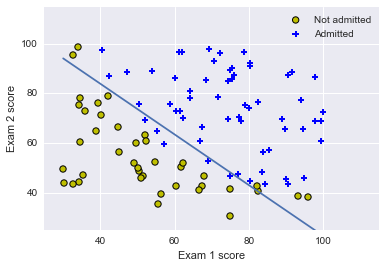

In [56]:
plotBoundary(data, X, thetas)

In [64]:
# predict test cases
test = np.array([1,45,85])

def predict( theta, X, binary=True ):
	prob = sigmoid( theta.dot( X ))
	if binary :
		return 1 if prob > 0.5 else 0
	else:
		return prob

print predict(test, thetas)

1


## Part 2 Assignment

In [ ]:
https://github.com/subokita/mlclass/blob/master/ex2_reg.py